0.017832040786743164
0.01646709442138672
0.017957210540771484
0.01660633087158203
0.016733884811401367
0.017246723175048828
0.01659703254699707
0.016650915145874023
0.016276121139526367
0.01669478416442871
0.01701641082763672
0.016598939895629883
0.017850160598754883
0.015264511108398438
0.016466140747070312
0.01745772361755371
0.015833616256713867
0.016932010650634766
0.01636672019958496
0.016832828521728516
0.017577648162841797
0.016324758529663086
0.01660919189453125
0.0161130428314209
0.017226457595825195
0.01566600799560547
0.017781496047973633
0.016324281692504883
0.016570568084716797
0.01688075065612793
0.01691436767578125
0.01607489585876465
0.0171358585357666
0.016954660415649414
0.016640424728393555
0.0158383846282959
0.016588926315307617
0.016566038131713867
0.016623497009277344
0.017346620559692383
0.016498327255249023
0.016281604766845703
0.01650261878967285
0.01686239242553711
0.016831398010253906
0.016887187957763672
0.0169370174407959
0.016671180725097656
0.016591548919

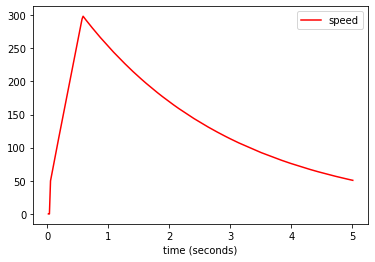

In [2]:
import sys
sys.path.append("../../")

from lib.data.dataplot import *
from lib.dds.dds import *
from lib.utils.time import *

dp = DataPlotter()
dp.set_x("time (seconds)")
dp.add_y("speed", "speed")

dds = DDS()
dds.start()

dds.subscribe(['speed'])
dds.publish('force', 5000.0, DDS.DDS_TYPE_FLOAT)

t = Time()
t.start()
while t.get() < 5:
    
    v = dds.wait('speed')
    
    delta_t = t.elapsed()
    print(delta_t)

    dds.publish('force', 0.0, DDS.DDS_TYPE_FLOAT)
    
    dp.append_x(t.get())
    dp.append_y("speed", v)

dp.plot()
